In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

### Training the model
We can train the model with train.py command. Few options for training commands are:


*   img - define the size of input image
*   batch - define the batch size
* epochs - define the number of training epochs
* data - path to yaml file
* cfg - specify the model configuration
* weights - specify the path for the weights for transfer learning. Weights can be downloaded from [here](https://drive.google.com/drive/folders/1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

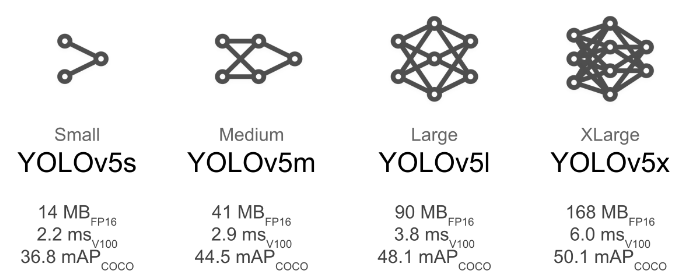

Comparison of the models can be seen [here](https://github.com/ultralytics/yolov5#pretrained-checkpoints).

In [ ]:
!python train.py --img 416 --batch 8 --epochs 10 --data '/content/drive/MyDrive/yolov5/data.yaml' --cfg ./models/yolov5s.yaml --weights '' 


In [ ]:
!cp runs/train/exp/weights/best.pt /content/drive/MyDrive/yolov5/best.pt


In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5/best.pt --conf 0.4 --source /content/drive/MyDrive/yolov5/test/images

In [ ]:
!ls runs/detect/exp
!pwd

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('./runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")